# 07 Decision Trees and Random Forests

Welcome to the 2nd half of this course, and the 7th practical session in Machine Learning. This session is on Decision Trees and Random Forests. 

Till now we've learnt about classical Machine Learning techniques. Now we're going to shift towards the *modern era* of Machine Learning, that lead to the present state of Artificial Intelligence. The state of Artificial Intelligence has become quite sophisticated.

At present, methods like Deep Learning and Reinforcement Learning are state of the art, and will remain so in the near future. These methods have only emerged recently.

In early 2000s, *Random Forests* was introduced, and it started becoming a popular method for Regression and Classification in Machine Learning. Part of the reason for its popularity was because of its ability to handle complexity well, and the other part of its popularity was its simplicity and intuitiveness.

Infact, even after the emergence of sophisticated methods like Deep Learning, Random Forests are still very significant. Deep Learning can solve a lot of complex problems, but is not very effective in many domains. For example, Deep Learning does not perform really well wherever traditional multi-layer perceptron type networks are used (it has reached to good levels of performance, buts its not sophisticated yet). For example, tabular data prediction is solved using traditional types of Neural Networks, and they do not perform very well as of now. But, Random Forests perform very well in the case of tabular data. Random Forests are infact more popular and effective than Neural Networks presently. (Though in 2019, some research showed that good feature engineering can help Neural Networks perform better, but still, Random Forests still outperform Neural Networks). Having said that, it is an important and really interesting topic to learn. We've tried to solve many problems using tabular data, so today we'll be learning of the State of the Art (for real) modeling technique in Machine Learning to predict on tabular data.

Random Forests are an extension of *Decision Trees*. So in this session, we'll first learn about Decision Trees, and then about Random Forests. 

## Decision Trees
Decision Trees are a very intuitive way to process information. They are not specific to Machine Learning, and actually come from psychology. Decision Trees were initially used to create logic models. Lets understand the beauty of Decision Trees with an example. 

<figure><center>
<img src='https://drive.google.com/uc?id=1pv7em1Ewu_90NllqHGdE-ww4pcmdrkss' width='60%'>
</figure>

[Figure Credits](https://medium.com/machine-learning-for-grandma/decision-tree-e6ab1037df16)

When one applies for a loan, the bank needs takes into consideration many factors. And there can be many "chains" of queries(or questions, or  that can determine the final outcome (whether or not a loan should be given out to the applicant). For example, the above figure shows the following chain of decisions to be made while considering a loan application. 

1. Do they have a credit history? Meaning, have they taken a loan before?

2. If yes, do they have a pledge? (Meaning an asset that is on another loan or mortgage). If no, then it doesn't matter whether they have a pledge or not. The important question now is, how much debt they have. If its less than some amount, then its a yes for the loan. If the amount is greater than a value, then its a no. 

and so on...

You can think of many examples in real life where you think through such a structured chain of thought. 

Decision Trees come with an idea of features ranked by importance. For example, in the above example, whether or not an applicant has a pledged asset is not necessarily a deciding factor, but whether or not a person has a credit history is!

So, how do Decision Trees work?


Decision Trees ask a series of binary questions (yes/no questions) to arrive to a conclusion. That is the entire model! Now once you have this model, you can simply traverse through the tree to find the final answer. 

A decision Tree starts with one question, that splits into a yes, and a no. Each one of those too split into further yes and no's. Each question is called a *node*.

The first question that is asked (or the first node. In this case, the question about whether or not an applicant has a credit history) is the most important question. Its called the *root* of the tree. The root *branches out* into *children nodes*. Each child further branches out, until we reach the final node in any branch. This node is called the *leaf* node.

How do we decide which feature is more important and which node is less important? And how do we decide the correct sequence of decisions that need to be taken? We'll briefly describe the method. 

Before that, let us pick an interesting problem. 

### Case Study: Tic Tac Toe 

<figure><center>
<img src='https://drive.google.com/uc?id=11R5WhfpfjNG0fs0fxg_gAd3N4cBMi_vt' width='15%'>
</figure>

You must have played a game of tic-tac-toe. Two players mark either a X or an O on a grid of 3x3 cells. If anyone manages to mark a complete row, column or diagonal, they win the game. We can visually look at the board and understand the meaning of a row, cell or column. But how would you hardcode the logic to a tic tac toe game app that you can find on the internet?

One of the ways is to build a tree, that goes as follows.
1. Mark all the cells as 1 through 9.
2. If a person marks cell, does the adjacent cell have the same mark?
3. If yes, then is does the same mark exist in the next cell _in the same direction_? 
4. If yes, the player wins the game.

[This](https://www.kaggle.com/aungpyaeap/tictactoe-endgame-dataset-uci) dataset contains all the possible configurations of the tic-tac-toe grid that result in one of the players winning the game. Each cell has three possible values - X, O or blank (b). Configurations that lead player 'X' to win are labeled as positive, and the ones that lead player 'O' to win, are labeled as negative. 

Our job is to build a classifier that can take in a board configuration and come to a conclusion about which player won the game. 

Let us download this dataset. Since we are downloading this dataset from *Kaggle*, we need to first upload the kaggle.json file, that you may have downloaded earlier. 

In [1]:
%cd 
from google.colab import files
uploaded = files.upload()
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json


/root


Saving kaggle.json to kaggle.json


In [2]:
!kaggle datasets download -d aungpyaeap/tictactoe-endgame-dataset-uci
!mkdir -p tictactoe && unzip tictactoe-endgame-dataset-uci.zip -d tictactoe
%cd tictactoe
!ls

  0% 0.00/3.43k [00:00<?, ?B/s]
100% 3.43k/3.43k [00:00<00:00, 2.66MB/s]
Archive:  tictactoe-endgame-dataset-uci.zip
  inflating: tictactoe/tic-tac-toe-endgame.csv  
/root/tictactoe
tic-tac-toe-endgame.csv


We have a csv file containing data. So we'll use the pandas library to read and process this library. 

In [3]:
import pandas as pd
df=pd.read_csv('tic-tac-toe-endgame.csv')
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


If the data is not intuitive to you, let us visualize the first row in a way that we are more used to seeing. 

In [4]:
import numpy as np

In [5]:
config_=df.iloc[0]
config=config_[:-1]
config=[o if o!='b' else '' for o in config]
print(f"winner: player {'X' if config_[-1]=='positive' else 'O'}")
pd.DataFrame(data=np.reshape(config,(3,3)))

winner: player X


,0,1,2
0,x,x,x
1,x,o,o
2,x,o,o


How many rows does this dataset contain in total?

In [6]:
len(df)

958

And are there any rows which contain incomplete information in this dataset?

In [7]:
df.isna().any().any()

False

No! There are no empty features in this dataset. We've now setup our data. The next step is to feed the data into the model. But before that, we need to *preprocess* the data. Meaning, we have to first convert each feature into numbers, because computers cannot understand anything other than numbers. So we need to categorize all variables into numbers.

We defined a function in Session 4 (On Bayesian Learning) called `categorify`, which categorizes each categorical variable, and also adds a method to the dataframe, called the `dictionary`, which keeps track of which categorical numbers refer to which original category. We'll categorify our dataframe below. 

In [8]:
def categorify(df):
    df.dictionary={}
    for col in df: 
        numerical_categories = {k:i for i,k in enumerate(sorted(df[col].unique()))}
        df[col]=[numerical_categories[i] for i in df[col]]
        df.dictionary[col]=numerical_categories
categorify(df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [9]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,2,2,2,2,1,1,2,1,1,1
1,2,2,2,2,1,1,1,2,1,1
2,2,2,2,2,1,1,1,1,2,1
3,2,2,2,2,1,1,1,0,0,1
4,2,2,2,2,1,1,0,1,0,1


You can see that all feaures in the dataframe are now numbers. Lets see which features refer to which

In [10]:
df.dictionary

{'V1': {'b': 0, 'o': 1, 'x': 2},
 'V10': {'negative': 0, 'positive': 1},
 'V2': {'b': 0, 'o': 1, 'x': 2},
 'V3': {'b': 0, 'o': 1, 'x': 2},
 'V4': {'b': 0, 'o': 1, 'x': 2},
 'V5': {'b': 0, 'o': 1, 'x': 2},
 'V6': {'b': 0, 'o': 1, 'x': 2},
 'V7': {'b': 0, 'o': 1, 'x': 2},
 'V8': {'b': 0, 'o': 1, 'x': 2},
 'V9': {'b': 0, 'o': 1, 'x': 2}}

Finally, lets split this data into the input and output , or `x` and `y`. 

In [11]:
x=df.drop(['V10'],axis=1)
y=df['V10']
len(x),len(y)

(958, 958)

Finally lets build the model that we will use to build the classifier. 

We won't build a Decision Tree from scratch, but use an already existing implementation that is provided by the scikitlearn library. 

In [12]:
from sklearn.tree import DecisionTreeClassifier

According to the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) here's the syntax to build a classifier. 

In [13]:
model = DecisionTreeClassifier(criterion = 'entropy', max_leaf_nodes=5)

To understand how this model works, Let's explain how Decision Trees are built!

As we mentioned before, Decision Trees are built upon the principle of ranking different features. For example, in the bank loan example, whether a person had a credit history is the most important feature.

Here are the steps to build a Decision Tree.

1. Go through each feature of the dataset one by one.
2. For each possible value in the feature column, classify all relevant datapoints using that value as the threshold.
3. Whichever threshold (among all values of all features) gives the best result becomes the criteria of classification at that node, and the corresponding feature becomes the node of the tree.
4. Continue till all datapoints till you reach a satisfactory result, or reach a maximum number of iterations. 

For example, while going through all features, when the model comes across the feature "credit history", and looks for all possible values. The possible values are 0 or 1. So the decision is, whether the value of credit history is 0 or 1. The ones for which credit history is 1, are classified as "positive" (for whether a loan should be given or not) "negative for the other". So there are, say, `a` number of datapoints in the branch where credit history is 1, and `b` datapoints in 0. All of the 'a' datapoints are *predicted* to be positive by this model at this point. And all of 
'b' datapoints are predicted as negative. Note, a+b is the total number of datapoints. And the reason that "credit history" was chosen as the node among all features, because it could classify the points the best among all features. Not perfect, but still the closest. 

Now, For the a datapoints, we go through all features again (excluding credit history, because we've already covered it for this particular branch.) and choose the feature that further gives the best accuracy while doing a split. And we do this until we reach a point where either all the datapoints have been correctly classified, or we've reached a limit on the *depth* or levels of the tree.  


In the syntax of the line `model = DecisionTreeClassifier(criterion = 'entropy', max_leaf_nodes=5)`

`criterion` is the metric which helps decide which feature is better than the other. Its similar to a loss function we've seen before. We've studied about Entropy Loss in Logistic Regression. Here we will use the 'entropy' criterion.

We will also put a limit to the maximum number of leaf nodes there can be, so that the model does not try to fit every single datapoint correctly. That would be similar to *overfitting*. We don't want that. So we'll stop the model to go all the way to the end. 

Let us now train (aka fit) the model. According to the documentation, here's the syntax to do so.

In [14]:
model.fit(x, y);

And we have built a Decision Tree. We would like to visualize this tree. We will do so by using the tree module in sklearn. Matplotlib is used to display the figure in Colab.

In [15]:
import matplotlib.pyplot as plt
from sklearn import tree

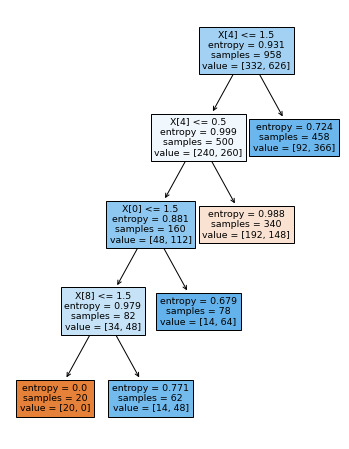

In [16]:
plt.figure(figsize=(6,8))
tree.plot_tree(model,filled=True)
plt.show()

For each node, the branch on the left corresponds to the 'Yes' case, and the right corresponds to 'No'. At each node, entropy of the decision tree is mentioned (basically, how well the tree is able to predict on the data , the lower - the better). You can also see that as we go down a tree, the entropy reduces. That is exactly what we want. 

`Samples` tells us about the number of datapoints that are classified as positive or negative by the node above it. You can verify that at any node, the number of datapoints on its left and right child nodes (ie the datapoints classified as positive or negative) add up to the number of datapoints in that node. 

And finally, we would like to see how good the model performs on the dataset. We will do this by finding the accuracy of predictions. We haven't used a validation/testing dataset for this problem. We'll simply examine the trend of model performance on the training dataset itself. 

In [17]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(x)
accuracy_score(y_pred,y)

0.7202505219206681

Ideally if you put no condition on the depth of the tree, the model will keep splitting the data until every datapoint is correctly classified. But that probably won't work well on real world data, because of overfitting. But never the less, lets try it out. 

In [18]:
model = DecisionTreeClassifier(criterion = 'entropy')
model.fit(x, y);
y_pred=model.predict(x)
accuracy_score(y_pred,y)

1.0

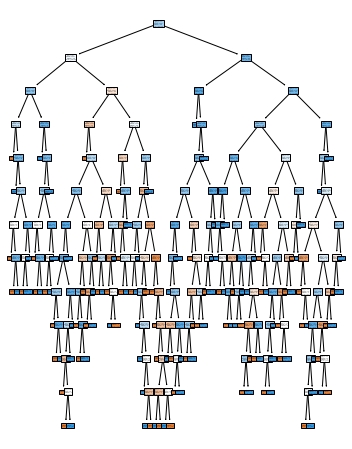

In [19]:
plt.figure(figsize=(6,8))
tree.plot_tree(model,filled=True)
plt.show()

This is quite a deep and complex decision tree! So, if you slowly increase the number of `max_leaf_nodes` in the model, your accuracy will increase. Initially we set it as 5, now lets set it as 20

In [20]:
model = DecisionTreeClassifier(criterion = 'entropy', max_leaf_nodes=20)
model.fit(x, y);

In [21]:
y_pred=model.predict(x)
accuracy_score(y_pred,y)

0.8308977035490606

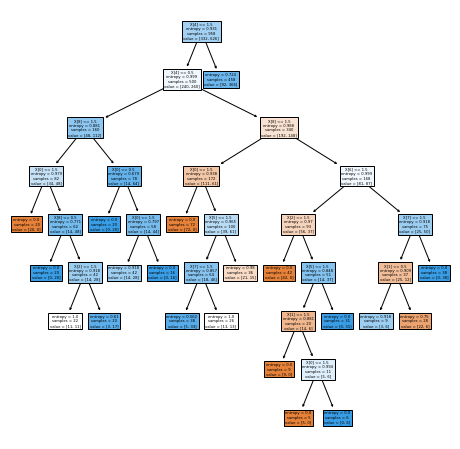

In [22]:
plt.figure(figsize=(8,8))
tree.plot_tree(model,filled=True)
plt.show()

You can see that the accuracy has increased!

So that is how Decision Trees are built in python!

Now let us understand what Random Forests are...

## Random Forests

In 1994, Leo Breiman, a recently retired UC Berkley professor of statistics introduced *Bagging*, which is a statistics technique used to improve the performance of models (It is actually used by almost all corporates in any Machine Learning application). The idea is to not rely on a single Machine Learning model to get predictions, because there might be errors in the model predictions. 

However, if you *aggregate* the results of multiple Machine Learning model (using a democracy rule), you are likely to get stronger predictions. For example, a particular model might predict an input wrongly, but it is quite less likely for 10 models to predict wrong on the same input.

Breiman proposed to do this by building multiple models, each with a random subset of the data. Because of the randomness, each model is independent of the other. The final result of the model is the aggregate of the predictions of all models. For example, for calssification, this  aggregation may be done by a majority-voting method. 

In 2001, Breiman demonstrated this method for Decision Trees, and that came to be called *Random Forests*. 

(Forests because forests have trees, and Random because of the randomness in the bagging technique.)

Sklearn provides us with a class that build a Random Forest Classifier for us. We will use this..


In [23]:
from sklearn.ensemble import RandomForestClassifier

We again set a limit on the maximum number of leaf nodes in any decision tree.

`n_estimators` is the number of decision trees in a Random Forest. Its default value is 100, meaning a 100 DTs will be built, and the final result will be an aggregate of all these 100 decision trees. 

There's also an attribute called as `max_samples` in the RandomForest function, which tells the model, what fraction of the entier dataset must be chosen to build any  of the 100 decision trees. 

In [24]:
model=RandomForestClassifier(criterion='entropy',max_leaf_nodes=5,n_estimators=100,max_samples=0.5)
model.fit(x,y);

In [25]:
y_pred=model.predict(x)
accuracy_score(y_pred,y)

0.755741127348643

You can see that the performance of a RandomForest for the same limit of `max_leaf_nodes` is better than its Decision Tree counterpart.

Try playing around with the parameters of the model function and see the effect on the performance.

# Excercise (Evaluative)

Your task is to build both Decision Trees and Random Forests for another task. The task we will use in this question is the [Mushroom Classification](https://www.kaggle.com/uciml/mushroom-classification) Dataset, which gives information about the mushrooms appearance, habitat, etc. We need to identify which mushroom is poisenous, and which is edible (given in the `class` column of the dataframe)



In [26]:
%cd
!kaggle datasets download -d uciml/mushroom-classification
!mkdir mushroom && unzip mushroom-classification.zip -d mushroom
%cd mushroom
!ls

/root
  0% 0.00/34.2k [00:00<?, ?B/s]
100% 34.2k/34.2k [00:00<00:00, 12.2MB/s]
Archive:  mushroom-classification.zip
  inflating: mushroom/mushrooms.csv  
/root/mushroom
mushrooms.csv


In [32]:
df=pd.read_csv('mushrooms.csv')
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


Some columns have `?`, which is equivalent to NaNs. We need to remove these blank values. 

In [33]:
(df=='?').any()

class                       False
cap-shape                   False
cap-surface                 False
cap-color                   False
bruises                     False
odor                        False
gill-attachment             False
gill-spacing                False
gill-size                   False
gill-color                  False
stalk-shape                 False
stalk-root                   True
stalk-surface-above-ring    False
stalk-surface-below-ring    False
stalk-color-above-ring      False
stalk-color-below-ring      False
veil-type                   False
veil-color                  False
ring-number                 False
ring-type                   False
spore-print-color           False
population                  False
habitat                     False
dtype: bool

'stalk-root' contains such ?'s. So we'll drop the entire column for the sake of this problem

In [34]:
df=df.drop('stalk-root',axis=1)

Exercise:
1. Build a Decision Tree for this dataset. Run this decision tree for `max_leaf_nodes` varying from 2 to 20. Store the accuracy of the model for each of these decision trees in a list.
2. Similarly build a Random Forest Model for `max_leaf_nodes` varying from 2 to 20. Store the accuracies in another list
3. Plot the accuracies of the two models in a single graph, using matplotlib.
4. Also plot another graph showing the effect of changing the `n_estimator` parameter of the Random FOrest constructor from 1 to 100, keeping `max_leaf_nodes` as 5.  

In [44]:
categorify(df)
x=df.drop(['class'],axis=1)
y=df['class']
len(x), len(y)

(8124, 8124)

In [36]:
dec_tree_acc=[]
max_leaf_nodes_list = [ i for i in range(2,21)]
for max_leaf_nodes in max_leaf_nodes_list:
  model = DecisionTreeClassifier(criterion = 'entropy', max_leaf_nodes=max_leaf_nodes)
  model.fit(x, y);
  y_pred=model.predict(x)
  dec_tree_acc.append(accuracy_score(y_pred,y))

In [37]:
rand_forr_acc=[]
for max_leaf_nodes in max_leaf_nodes_list:
  model = RandomForestClassifier(criterion='entropy',max_leaf_nodes=max_leaf_nodes,n_estimators=100,max_samples=0.5)
  model.fit(x, y);
  y_pred=model.predict(x)
  rand_forr_acc.append(accuracy_score(y_pred,y))

Text(0, 0.5, 'Accuracy')

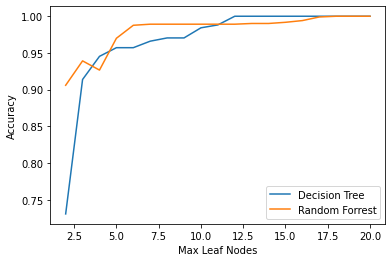

In [38]:
plt.plot(max_leaf_nodes_list, dec_tree_acc)
plt.plot(max_leaf_nodes_list, rand_forr_acc)
plt.legend(['Decision Tree', 'Random Forrest'])
plt.xlabel('Max Leaf Nodes')
plt.ylabel('Accuracy')

In [40]:
rand_forr_acc=[]
n_estimators_list = [i for i in range(1, 101)]
for n_estimators in n_estimators_list:
  model = RandomForestClassifier(criterion='entropy',max_leaf_nodes=5,n_estimators=n_estimators,max_samples=0.5)
  model.fit(x, y);
  y_pred=model.predict(x)
  rand_forr_acc.append(accuracy_score(y_pred,y))

Text(0, 0.5, 'Accuracy')

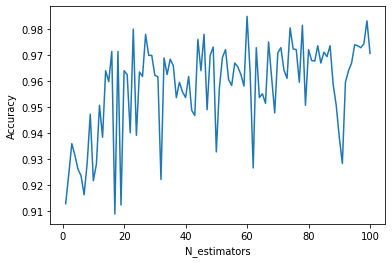

In [41]:
plt.plot(n_estimators_list, rand_forr_acc)
plt.xlabel('N_estimators')
plt.ylabel('Accuracy')